In [1]:
import argparse
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

/Users/hknam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from utilities import visualize_classifier

In [5]:
def build_arg_parser():
    parser = argparse.ArgumentParser(description = 'Classification data using Ensemble Learning techniques')
    parser.add_argument('--classifier-type', dest = 'classifier_type',
    required = True, choices = ['rf', 'erf'], help = '''Type of Classifier to use; can be either 'rf ' or ''erf' ''')
    return parser

In [6]:
def main(classifier_type):
    
    #args = build_arg_parser().parse_args()
    #classifier_type = args.classifier_type
        
    input_file = 'data_random_forests.txt'
    data = np.loadtxt('./data/' + input_file, delimiter = ',')
    X, y = data[:, :-1], data[:, -1]
    
    class_0 = np.array(X[y == 0])
    class_1 = np.array(X[y == 1])
    class_2 = np.array(X[y == 2])
    
    plt.figure()
    plt.scatter(class_0[:, 0], class_0[:, 1], s = 75, facecolors = 'white',
                edgecolors = 'black', linewidth = 1, marker = 's')
    plt.scatter(class_1[:, 0], class_1[:, 1], s = 75, facecolors = 'white',
                edgecolors = 'black', linewidth = 1, marker = 'o')
    plt.scatter(class_2[:, 0], class_2[:, 1], s = 75, facecolors = 'white',
                edgecolors = 'black', linewidth = 1, marker = '^')
    plt.title('Input data')
    
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.25, random_state =5)
    
    params = {'n_estimators' : 100, 'max_depth' : 4, 'random_state' : 0}
    
    if classifier_type == 'rf':
        classifier = RandomForestClassifier(**params)
    else:
        classifier = ExtraTreesClassifier(**params)
        
    classifier.fit(X_train, y_train)
    visualize_classifier(classifier, X_train, y_train, 'Training dataset')
    
    y_test_pred = classifier.predict(X_test)
    visualize_classifier(classifier, X_test, y_test, 'Test dataset')
    
    class_names = 'Class-0', 'Class-1', 'Class-2'
    print('#' * 40)
    print('Classifier performance on training dataset')
    print(classification_report(y_train, classifier.predict(X_train), target_names = class_names))
    print('#' * 40 + '\n')
    
    print('# 40')
    print('Classifier performance on test dataset')
    print(classification_report(y_test, y_test_pred, target_names = class_names))
    print('#' * 40)

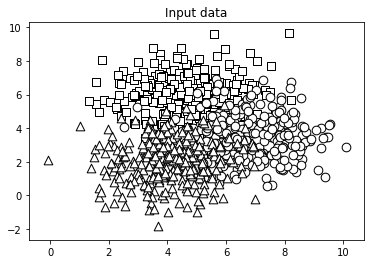

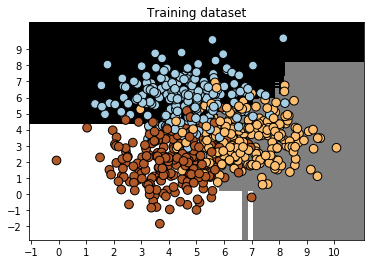

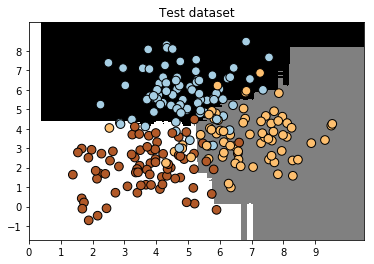

########################################
Classifier performance on training dataset
             precision    recall  f1-score   support

    Class-0       0.91      0.86      0.88       221
    Class-1       0.84      0.87      0.86       230
    Class-2       0.86      0.87      0.86       224

avg / total       0.87      0.87      0.87       675

########################################

# 40
Classifier performance on test dataset
             precision    recall  f1-score   support

    Class-0       0.92      0.85      0.88        79
    Class-1       0.86      0.84      0.85        70
    Class-2       0.84      0.92      0.88        76

avg / total       0.87      0.87      0.87       225

########################################


In [7]:
if __name__ == '__main__':
    main('rf')